In [13]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files


In [14]:
from google.colab import drive #to import the google drive data

In [15]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
cd /content/drive/"My Drive/ML nishit sir/Ass1" 

/content/drive/My Drive/ML nishit sir/Ass1


In [17]:
dataset = pd.read_csv("HR_comma_sep.csv")
print(dataset)

       satisfaction_level  last_evaluation  ...  Department  salary
0                    0.38             0.53  ...       sales     low
1                    0.80             0.86  ...       sales  medium
2                    0.11             0.88  ...       sales  medium
3                    0.72             0.87  ...       sales     low
4                    0.37             0.52  ...       sales     low
...                   ...              ...  ...         ...     ...
14994                0.40             0.57  ...     support     low
14995                0.37             0.48  ...     support     low
14996                0.37             0.53  ...     support     low
14997                0.11             0.96  ...     support     low
14998                0.37             0.52  ...     support     low

[14999 rows x 10 columns]


In [18]:
dataset.shape

(14999, 10)

In [19]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [20]:
satisfaction_level_value = dataset['satisfaction_level'].values.reshape(dataset['satisfaction_level'].values.size)
last_evaluation_value = dataset['last_evaluation'].values.reshape(dataset['last_evaluation'].values.size)
number_project_value = dataset['number_project'].values.reshape(dataset['number_project'].values.size)
average_montly_hours_value = dataset['number_project'].values.reshape(dataset['number_project'].values.size)
time_spend_company_value = dataset['time_spend_company'].values.reshape(dataset['time_spend_company'].values.size)
Work_accident_value = dataset['Work_accident'].values.reshape(dataset['Work_accident'].values.size)
left_value = dataset['left'].values.reshape(dataset['left'].values.size)
promotion_last_5years_value = dataset['promotion_last_5years'].values.reshape(dataset['promotion_last_5years'].values.size)

#satisfaction_level_value = dataset.iloc[0:dataset.shape[0],0:1]

In [21]:
#last_evaluation_value = dataset.iloc[0:dataset.shape[0],1:2]

In [22]:
#number_project_value = dataset.iloc[0:dataset.shape[0],2:3]

In [23]:
#average_montly_hours_value = dataset.iloc[0:dataset.shape[0],3:4]

In [24]:
#time_spend_company_value = dataset.iloc[0:dataset.shape[0],4:5]

In [25]:
#Work_accident_value = dataset.iloc[0:dataset.shape[0],5:6]

In [26]:
#left_value = dataset.iloc[0:dataset.shape[0],6:7]  #y

In [27]:
#promotion_last_5years_value = dataset.iloc[0:dataset.shape[0],7:8]

In [28]:
dataf=pd.DataFrame(dataset)
department_dict={'sales':1,'accounting':2,'hr':3,'technical':4,'support':5,'IT':6,'product_mng':7,'management':8,'RandD':9,'marketing':10}
dataf['Department'] = dataf['Department'].map(department_dict)
#department_value['Department'] = dataset['Department'].map(department_dict)
#department_value = department_value['Department'].values.reshape(department_value['Department'].values.size)
#department_dict={"sales":1,"accounting":2,"hr":3,"technical":4,"support":5,"IT":6,"product_mng":7,"management":8,"RandD":9,"marketing":10}

#print(department_dict)

#print(department_value)

In [29]:
salary_dict={"low":1,"medium":2,"high":3}
dataf['salary'] = dataf['salary'].map(salary_dict)
#salary_value = salary_value['salary'].values.reshape(salary_value['salary'].values.size)

#salary_value = dataset.iloc[:,9:10]

#print(salary_value)

In [30]:
type(dataset)

pandas.core.frame.DataFrame

In [31]:
#defining the Hypothesis    : H(x) = theta0 + theta1*x1 + theta2*x2

def hypothesis(theta_array,x1,x2,x3,x4,x5,x6,x7,x8,x9):      #theta_array = [theta_array[0],theta_array[1],theta_array[2]]
    return theta_array[0]+(theta_array[1]*x1)+(theta_array[2]*x2)+(theta_array[3]*x3)+(theta_array[4]*x4)+(theta_array[5]*x5)+(theta_array[6]*x6)+(theta_array[7]*x7)+(theta_array[8]*x8)+(theta_array[9]*x9)

In [32]:
def cost_function(theta_array,x1,x2,x3,x4,x5,x6,x7,x8,x9,y,m):   #x and y are list of observation.
    total_error = 0     #accumulate all the error
    for i in range(m):
        total_error+=(theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i]+theta_array[9]*x9[i] - y[i])**2

    return total_error/(2*m)

In [33]:
def gradient_descent(theta_array,x1,x2,x3,x4,x5,x6,x7,x8,x9,y,alpha,m):
    summation_theta0 = 0
    summation_theta1 = 0
    summation_theta2 = 0
    summation_theta3 = 0
    summation_theta4 = 0
    summation_theta5 = 0
    summation_theta6 = 0
    summation_theta7 = 0
    summation_theta8 = 0
    summation_theta9 = 0

    for i in range(m):
        summation_theta0= summation_theta0 + ((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i]+theta_array[9]*x9[i]) - y[i])
        summation_theta1+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i]+theta_array[9]*x9[i]) - y[i])*x1[i])
        summation_theta2+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i]+theta_array[9]*x9[i]) - y[i])*x2[i])
        summation_theta3+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i]+theta_array[9]*x9[i]) - y[i])*x3[i])
        summation_theta4+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i]+theta_array[9]*x9[i]) - y[i])*x4[i])
        summation_theta5+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i]+theta_array[9]*x9[i]) - y[i])*x5[i])
        summation_theta6+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i]+theta_array[9]*x9[i]) - y[i])*x6[i])
        summation_theta7+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i]+theta_array[9]*x9[i]) - y[i])*x7[i])
        summation_theta8+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i]+theta_array[9]*x9[i]) - y[i])*x8[i])
        summation_theta9+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]+theta_array[8]*x8[i]+theta_array[9]*x9[i]) - y[i])*x9[i])

    new_theta0 = theta_array[0]-alpha*(summation_theta0/m)
    new_theta1 = theta_array[1]-alpha*(summation_theta1/m)
    new_theta2 = theta_array[2]-alpha*(summation_theta2/m)
    new_theta3 = theta_array[3]-alpha*(summation_theta3/m)
    new_theta4 = theta_array[4]-alpha*(summation_theta4/m)
    new_theta5 = theta_array[5]-alpha*(summation_theta5/m)
    new_theta6 = theta_array[6]-alpha*(summation_theta6/m)
    new_theta7 = theta_array[7]-alpha*(summation_theta7/m)
    new_theta8 = theta_array[8]-alpha*(summation_theta8/m)
    new_theta9 = theta_array[9]-alpha*(summation_theta9/m)

    updated_theta_array = [new_theta0,new_theta1,new_theta2,new_theta3,new_theta4,new_theta5,new_theta6,new_theta7,new_theta8,new_theta9]
    #print(updated_theta_array)
    return updated_theta_array

In [34]:
def training(x1,x2,x3,x4,x5,x6,x7,x8,x9,y,alpha,iters):
    theta_0 = 0
    theta_1 = 0
    theta_2 = 0
    theta_3 = 0
    theta_4 = 0
    theta_5 = 0
    theta_6 = 0
    theta_7 = 0
    theta_8 = 0
    theta_9 = 0
    theta_array = [theta_0,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7,theta_8,theta_9]

    m=x1.size                #size of the data set or the number of observation
    cost_function_values = []
    for i in range(iters):
        theta_array = gradient_descent(theta_array,x1,x2,x3,x4,x5,x6,x7,x8,x9,y,alpha,m)     #taking the new theta's
        cost_function_values.append(cost_function(theta_array,x1,x2,x3,x4,x5,x6,x7,x8,x9,y,m))   #taking all the cost function values and storing
        if(i%6==0):
            y_new=x9*theta_array[9]+x8*theta_array[8]+x7*theta_array[7]+x6*theta_array[6]+x5*theta_array[5]+x4*theta_array[4]+x3*theta_array[3]+x2*theta_array[2]+x1*theta_array[1]+theta_array[0]       #linear regression line
            plt.plot(x1,y_new,'r')
            plt.scatter(x1,y)
            plt.show()

    x=np.arange(0,len(cost_function_values),step=1)
    plt.plot(x,cost_function_values,"-b")
    plt.xlabel("number of iteration")
    plt.ylabel("Cost/loss values")
    plt.title("cost Function curve")
    plt.show()

    return theta_array

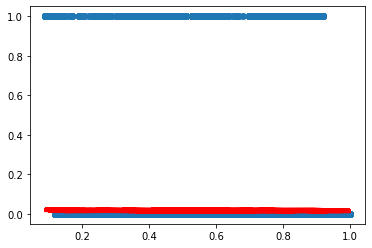

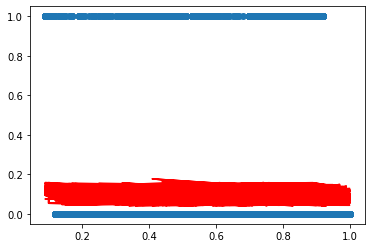

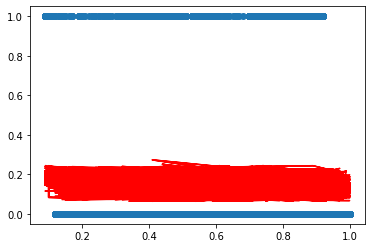

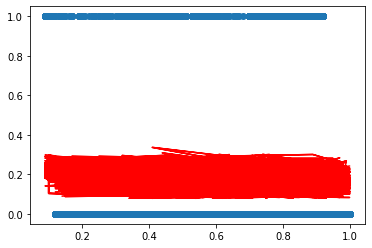

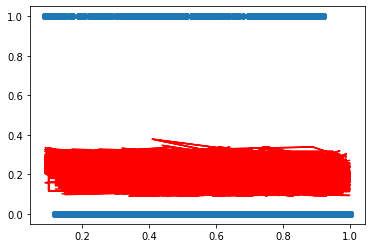

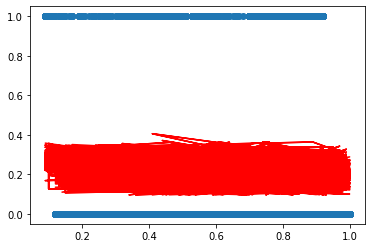

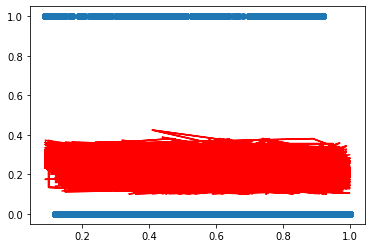

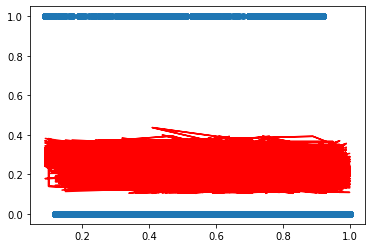

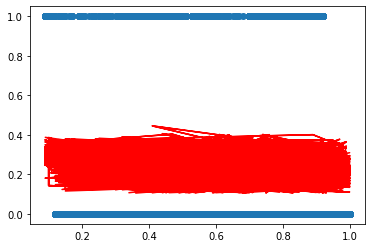

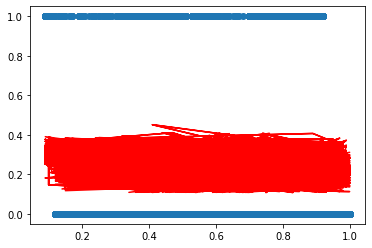

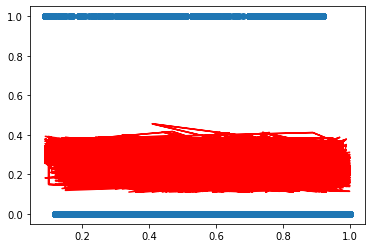

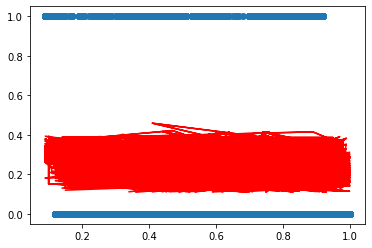

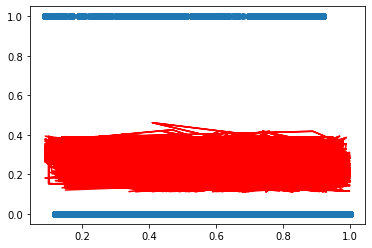

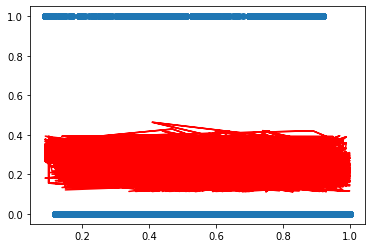

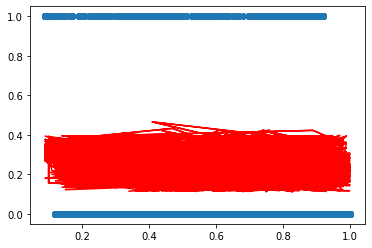

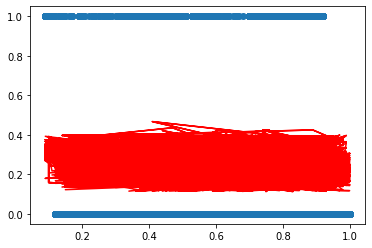

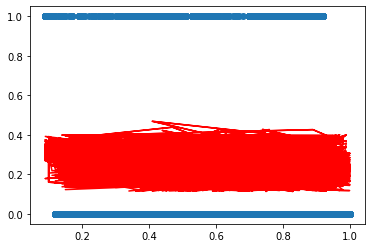

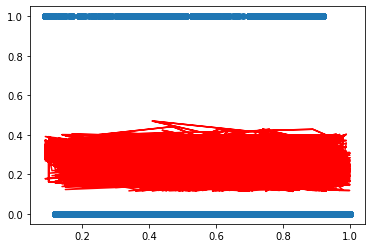

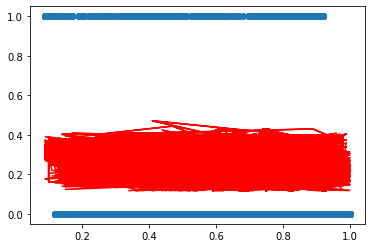

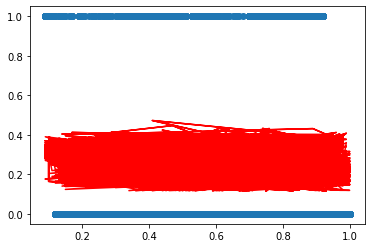

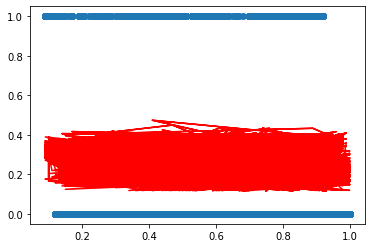

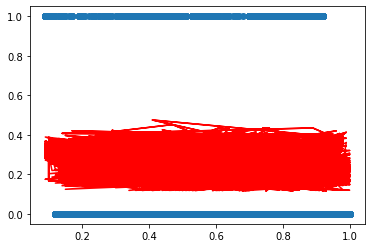

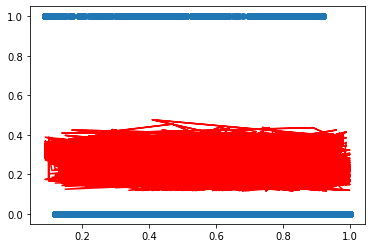

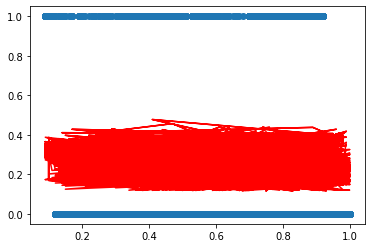

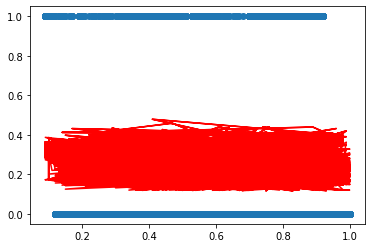

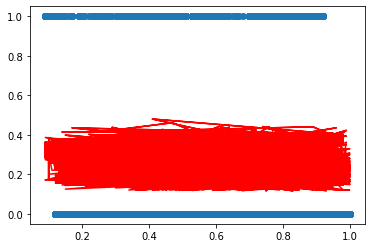

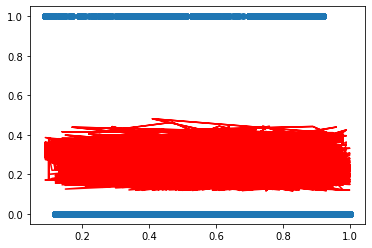

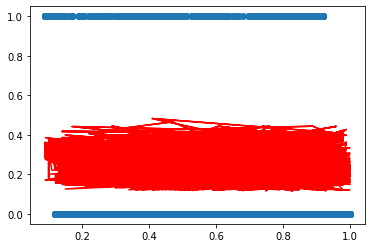

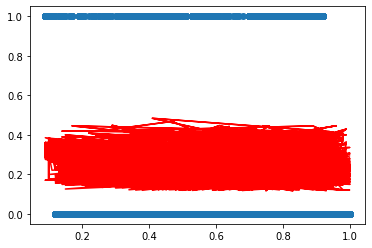

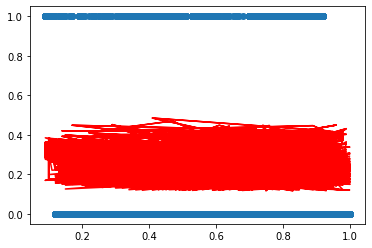

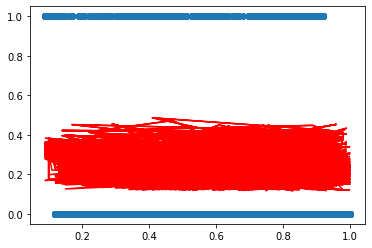

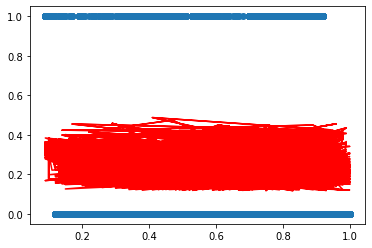

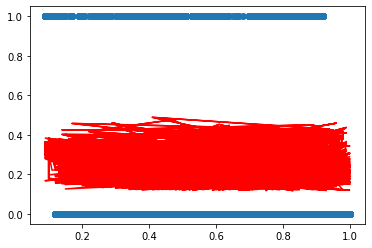

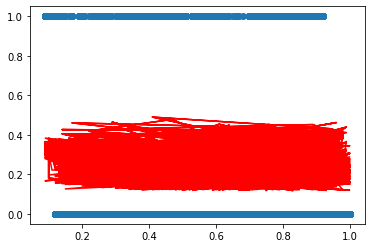

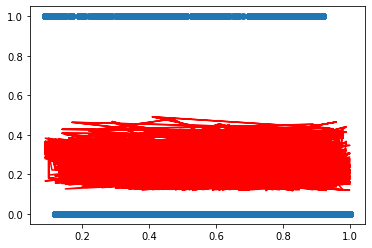

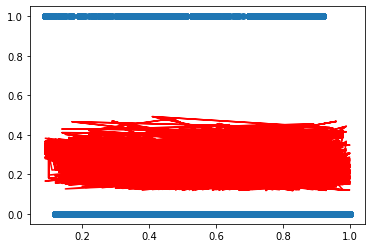

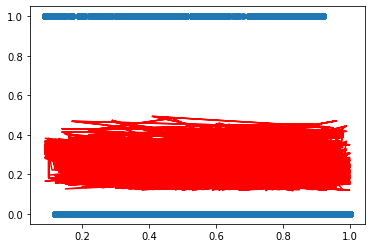

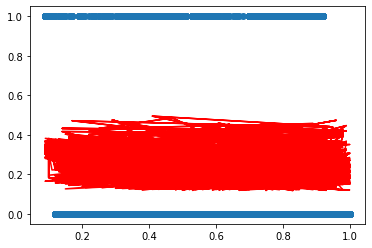

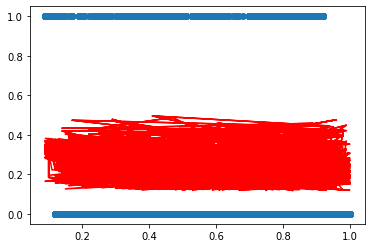

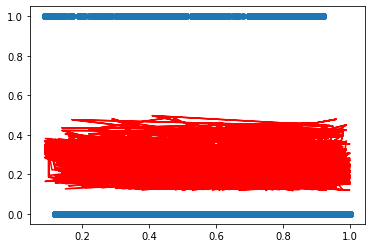

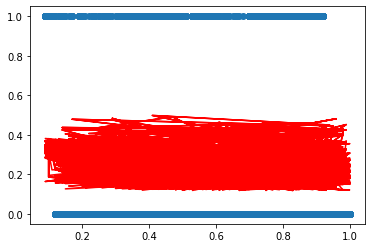

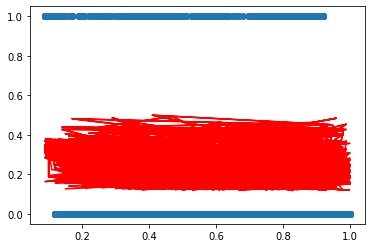

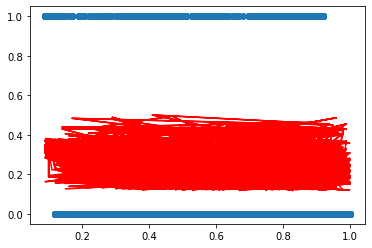

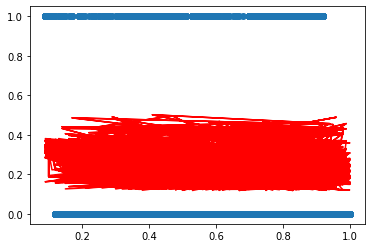

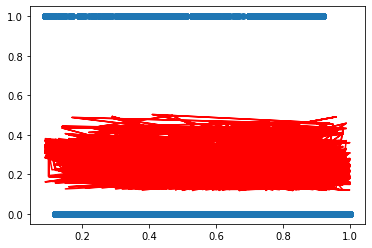

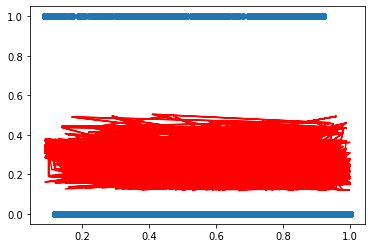

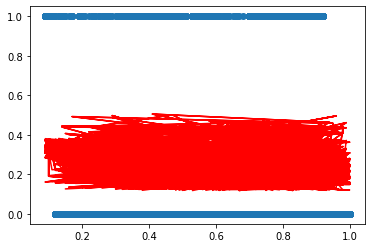

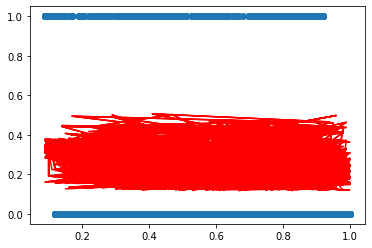

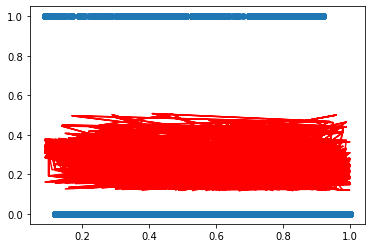

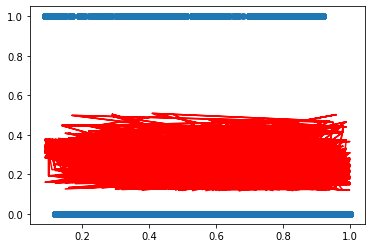

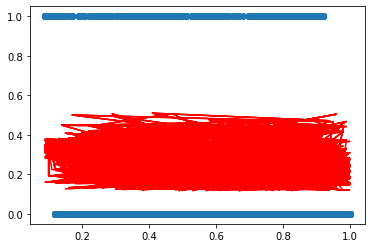

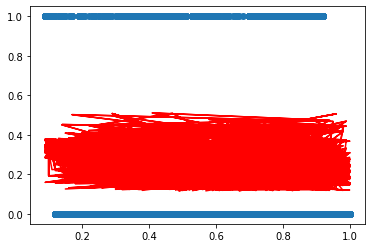

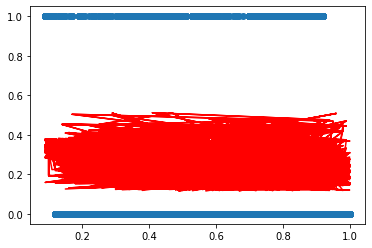

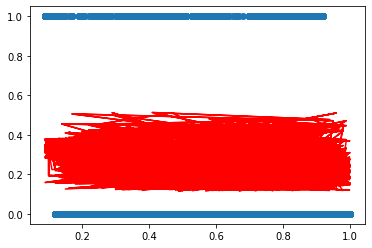

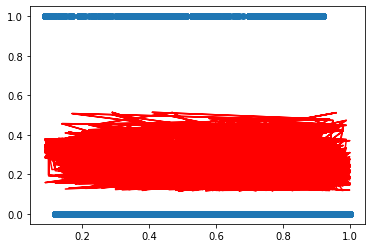

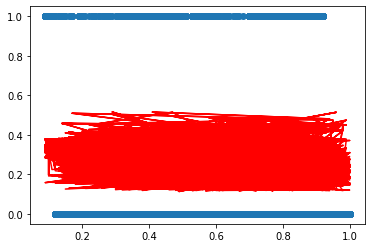

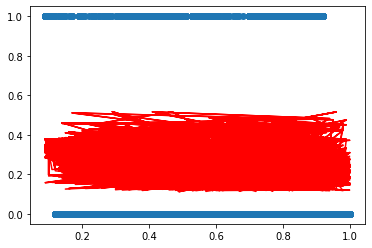

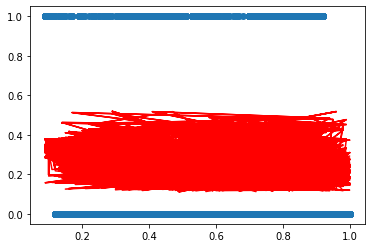

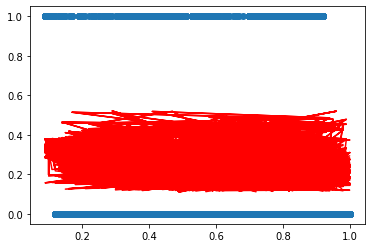

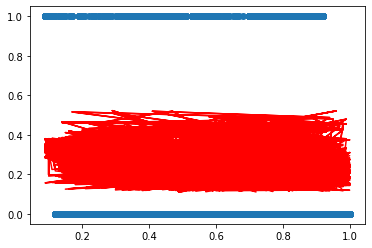

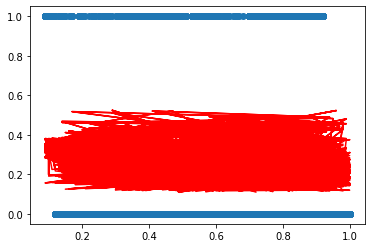

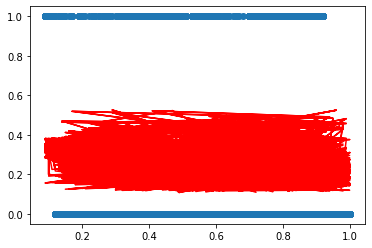

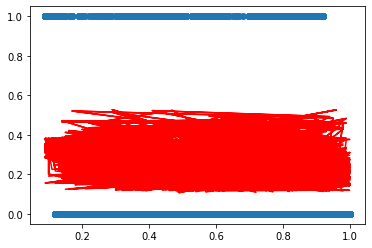

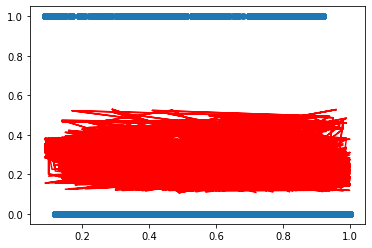

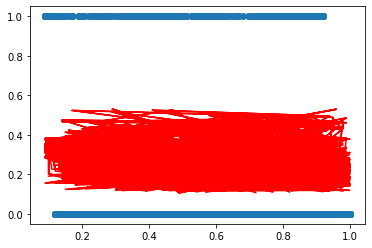

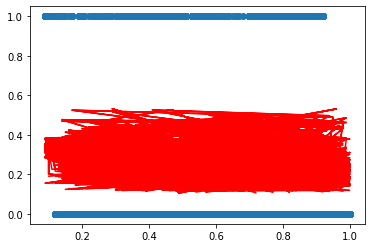

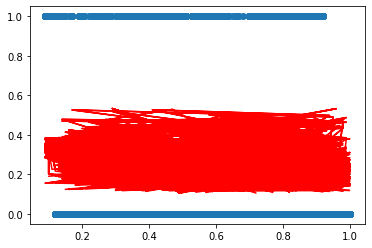

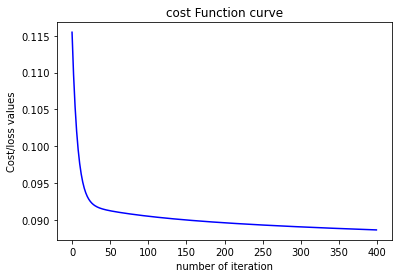

[0.007836082013062096,
 -0.01068256879279056,
 0.004593843844508632,
 0.013970429918204939,
 0.013970429918204939,
 0.03695181773232681,
 -0.007955207612503599,
 -0.001504157780172109,
 -0.0006105115189176447,
 -0.005224848226312603]

In [36]:
alpha=0.001
iters=400
training(satisfaction_level_value,last_evaluation_value,number_project_value,average_montly_hours_value,time_spend_company_value,Work_accident_value,promotion_last_5years_value,dataf['Department'],dataf['salary'],left_value,alpha,iters)